In [1]:
%%capture
!pip install langchain_core langchain langchain_community langgraph langchain-google-genai

In [2]:
import os

os.environ["GOOGLE_API_KEY"]=google_api_key

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm=ChatGoogleGenerativeAI(
    model="gemini-1.5-flash-latest",
    temperature=0
    )

In [4]:
from typing_extensions import TypedDict
from typing import List,Annotated
from langchain_core.messages import BaseMessage , HumanMessage
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import InMemorySaver




class ChatState(TypedDict):
    messages:Annotated[List[BaseMessage],add_messages]

In [5]:
from langgraph.graph import StateGraph
from langgraph.graph import END,START
workflow=StateGraph(ChatState)

In [6]:
def chat_node(state:ChatState):
  #user query or user message
  user_message=state['messages']

  #llm generate
  response=llm.invoke(user_message)
  #state update
  return {"messages":[response]}

In [7]:
workflow.add_node("chat_node",chat_node)



In [8]:
workflow.add_edge(START,"chat_node")
workflow.add_edge("chat_node",END)

In [9]:
Checkpointer=InMemorySaver()

In [10]:
chatbot=workflow.compile(checkpointer=Checkpointer)


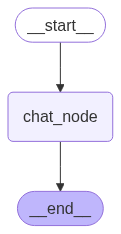

In [11]:
chatbot

In [14]:
user="what is llm?"
res=chatbot.invoke({"messages":user})['messages'][1].content
res

"LLM stands for **Large Language Model**.  It's a type of artificial intelligence (AI) that's trained on massive amounts of text data.  This training allows it to understand, generate, and translate human language.  LLMs can perform a wide range of tasks, including:\n\n* **Text generation:** Writing stories, articles, summaries, code, etc.\n* **Translation:** Converting text from one language to another.\n* **Question answering:** Providing answers to questions based on its training data.\n* **Chatbots:** Engaging in conversations with users.\n* **Summarization:** Condensing large amounts of text into shorter summaries.\n\nEssentially, LLMs are sophisticated pattern-matching machines.  They learn statistical relationships between words and phrases in the data they're trained on, allowing them to predict the most likely next word in a sequence, and thus generate coherent and contextually relevant text.  Examples of LLMs include GPT-3, LaMDA, and PaLM."

In [16]:
res=chatbot.invoke({"messages":HumanMessage(content="what is a chatbot?")})['messages'][1].content
res

'A chatbot is a computer program designed to simulate conversation with human users, especially over the internet.  They achieve this through artificial intelligence (AI) and natural language processing (NLP).  Chatbots can be simple, following pre-programmed rules to respond to specific keywords or phrases, or they can be sophisticated, using machine learning to understand and respond to a wider range of inputs and learn from past interactions.\n\nEssentially, chatbots are designed to automate conversations, providing information, assistance, or entertainment to users.  They are used in a variety of applications, including:\n\n* **Customer service:** Answering frequently asked questions, resolving simple issues, and guiding users to appropriate resources.\n* **E-commerce:** Assisting with product selection, order placement, and tracking.\n* **Education:** Providing tutoring, answering questions about course material, and offering personalized learning experiences.\n* **Entertainment:*

In [12]:
thread_id="1"
config={"configurable":{"thread_id":thread_id}}
response=chatbot.invoke({"messages":"hi i am Manas . "},config=config)
response


{'messages': [HumanMessage(content='hi i am Manas . ', additional_kwargs={}, response_metadata={}, id='acba02fb-06c5-4fa4-b912-650b28867120'),
  AIMessage(content="Hi Manas, it's nice to meet you!  How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash-latest', 'safety_ratings': []}, id='run--fc6d1c34-f026-42d0-9e6e-dc8127e73fd6-0', usage_metadata={'input_tokens': 6, 'output_tokens': 20, 'total_tokens': 26, 'input_token_details': {'cache_read': 0}})]}

In [13]:
thread_id="1"
config={"configurable":{"thread_id":thread_id}}
response=chatbot.invoke({"messages":"capital of india ?"},config=config)
response

{'messages': [HumanMessage(content='hi i am Manas . ', additional_kwargs={}, response_metadata={}, id='acba02fb-06c5-4fa4-b912-650b28867120'),
  AIMessage(content="Hi Manas, it's nice to meet you!  How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash-latest', 'safety_ratings': []}, id='run--fc6d1c34-f026-42d0-9e6e-dc8127e73fd6-0', usage_metadata={'input_tokens': 6, 'output_tokens': 20, 'total_tokens': 26, 'input_token_details': {'cache_read': 0}}),
  HumanMessage(content='capital of india ?', additional_kwargs={}, response_metadata={}, id='946dcc4b-b344-4173-ad59-80d9ad26154b'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash-latest', 'safety_ratings': []}, id='run--1dcd7ed6-3c98-41

In [14]:
thread_id="1"
config={"configurable":{"thread_id":thread_id}}
response=chatbot.invoke({"messages":"Do u know my name? "},config=config)
response

{'messages': [HumanMessage(content='hi i am Manas . ', additional_kwargs={}, response_metadata={}, id='acba02fb-06c5-4fa4-b912-650b28867120'),
  AIMessage(content="Hi Manas, it's nice to meet you!  How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash-latest', 'safety_ratings': []}, id='run--fc6d1c34-f026-42d0-9e6e-dc8127e73fd6-0', usage_metadata={'input_tokens': 6, 'output_tokens': 20, 'total_tokens': 26, 'input_token_details': {'cache_read': 0}}),
  HumanMessage(content='capital of india ?', additional_kwargs={}, response_metadata={}, id='946dcc4b-b344-4173-ad59-80d9ad26154b'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash-latest', 'safety_ratings': []}, id='run--1dcd7ed6-3c98-41

In [17]:
response['messages'][-1].content

'Yes, I remember you introduced yourself as Manas.'

In [18]:
#chat bot
thread_id="1"
while True:
  user_message=input("user : ")
  if user_message.strip().lower() in ['exit','q','quit','bye']:
    config={"configurable":{"thread_id":thread_id}}
    response=chatbot.invoke({"messages":"i am quitting from this chat "},config=config)
    print(f"bot : {response['messages'][-1].content}")

    break
  config={"configurable":{"thread_id":thread_id}}

  response=chatbot.invoke({"messages":HumanMessage(content=user_message)},config=config)
  print(f"bot : {response['messages'][-1].content}")



user : hi i am Manas
bot : Hi Manas!  It's good to see you again.  How are you doing today?
user : good
bot : That's great to hear! Is there anything I can help you with today?
user : what is the capital of india
bot : The capital of India is New Delhi.
user : who is ironMan
bot : Iron Man is a superhero appearing in comic books published by Marvel Comics.  His real name is Tony Stark, a brilliant billionaire inventor and playboy.  He created a powerful armored suit that gives him superhuman abilities and uses it to fight crime and protect the world.
user : ohh nice
bot : Great! Is there anything else I can help you with today, Manas?
user : do u know my name
bot : Yes, I remember you told me your name is Manas.
user : can u tell what is gender
bot : Gender is a social construct that refers to the roles, behaviors, expressions, and identities of individuals.  It's different from sex, which refers to biological traits (chromosomes, hormones, and anatomy).  While sex is typically assigne